# Generación de la gráfca de la radiación espectral de cuerpo negro

En este código se genera la gráfica de la radición de densidad de radianza espectral $B_\nu(\nu, T)$ de cuerpo negro por unidad de área, en función de una temperatura dada y al rango de longitudes de onda $\nu$ a emplear. Esta radiación se encuentra en unidades de energía por unidad de área: $\frac{J}{m^2}$. A esta magnitud también se le puede llamar luminosidad por unidad de área.

Además, se usará la ecuación de Plank para esta radiación de cuerpo negro, y ella se comparará con las aproximaciones de  Wien y Rayleigh-Jeans. 

Autor: Juan Andrés Guarín Rojas  \
Código: 2201870

## 1. Importación de Bibliotecas

In [66]:
# Se importan las bibliotecas necesarias

import numpy as np                       #Biblioteca para cálculos matemáticos
import matplotlib.pyplot as plt          #Módulo para generar gráficas
from astropy import constants as const   #Módulo de astropy para importar constantes físicas
from astropy import units as u           #Módulo de astropy para agregar unidades de magnitud (Kg,m,s)

## 2. Definición de las constantes del código

In [67]:
# Se importan las constantes que se usarán, con el módulo const. 

"""
Como estas constantes se importan con el módulo constants, estás tienen las unidades del 
sistema internacional por defecto. 
""" 

h = const.h       # Constante de Plank
c = const.c      # Velocidad de la luz en el vacío
K_B = const.k_B   # Constante de Boltzmann

## 3. Declaración de las funciones

En esta parte se muestran las ecuaciones que se usarán para graficar la radición de densidad de radianza espectral de cuerpo negro. Estas tres ecuaciones se muestran a continuación.

La ecuación de plank para la radición de densidad de radianza espectral es:

\begin{equation}
    B_\nu(\nu, T) = \frac{2 h \nu^3}{c^2} \frac{1}{ e^{\frac{h \nu}{K_B T}} -1}  
\end{equation}

La aproximación de Wien para la misma ecuación es: 

\begin{equation}
    B_\nu(\nu, T) \approx \frac{2 h \nu^3}{c^2} e^{\frac{-h \nu}{K_B T}} 
\end{equation}

La aproximación de Rayleigh-Jeans para esta misma es: 

\begin{equation}
    B_\nu(\nu, T) \approx \frac{2 \nu^2}{c^2} K_B T  
\end{equation}

Donde:


* $B_\nu(\nu, T)$ representa la densidad de radiación espectral unidades de $J/m^2$, que se basa en el valor de $\nu$ y T.
* $\nu$ es la frecuencia de la onda luminica.
* $T$ es la temperatura del cuerpo.
* $h$ es la constante de plank.
* $c$ es la velocidad de la luz en el vacío.
* $K_B$ es la constante de Bolztmann.



In [68]:
# Se declaran las funciones tomando en cuenta la expresión anterior y la constantes.

def B_plank(v, T):   #l es la longitud de onda lambda, y T es la temperatura.
    value_B = 2*h*v**3/( c**2*(np.exp(h*v/(K_B*T))-1) ) 
    return value_B

def B_wien(v, T):   #l es la longitud de onda lambda, y T es la temperatura.
    value_B = 2*h*v**3/c**2*np.exp(-h*v/(K_B*T))
    return value_B

def B_ray_jeans(v, T):   #l es la longitud de onda lambda, y T es la temperatura.
    value_B = 2*v**2/c**2*K_B*T
    return value_B

In [69]:
# Se evalua y muestra en pantalla la función B_plank evaluada en un punto para verificar unidades de magnitud.

print(B_plank(600*10**12*1/u.s, 5000*u.K)) 
#'1/u.s' indica que el primer valor está en Hertz [1/s] , y 'u.K' indica que el segundo está en Kelvins.

1.0076937109348383e-08 J / m2


## 4. Creación de los vectores que contendrán los datos a graficar

Se hallan los vectores con los datos de frecuencia $\nu$ y de densidad de radianza espectral $B_\nu$.

In [70]:
# En el caso de la frecuencia se usa el rango de nu desde 1x10^7 hasta 4x10^9 Hz.
v_data = np.linspace(2*10**7, 2*10**9, 1500)/u.s

# La temperatura dada es de 8 mili Kelvin para este código.
T = 8*10**-3 * u.K

# Se halla la luminosidad por unidad de área (densidad de radianza espetral) para cada ecuación.
B1 = B_plank(v_data, T)
B2 = B_wien(v_data, T)
B3 = B_ray_jeans(v_data, T)

In [71]:
# Se verifica que B_v este en las unidades correctas de J/(m^2)
print(B1[100])

3.4807261937017563e-26 J / m2


## 5. Graficación de los datos

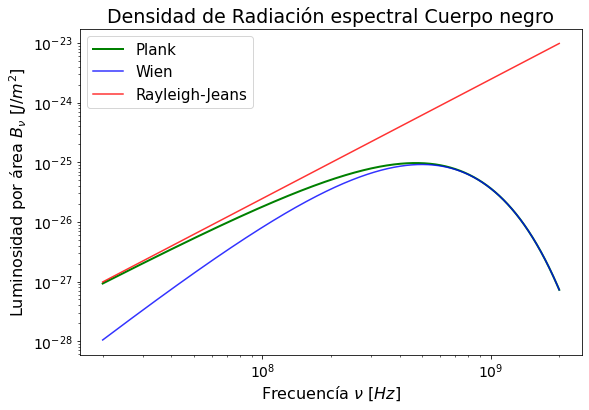

In [72]:
#Creamos la figura
a = plt.figure(figsize=(9,6))
ax = a.add_subplot(111)

#Graficamos la luminosidad por unidad de area de acuerdo a cada ecuación, usando escala logarítmica
plt.loglog(v_data, B1, 'g', label='Plank', linewidth=2)
plt.loglog(v_data, B2, 'b', label='Wien',linewidth=1.5, alpha=.8)
plt.loglog(v_data, B3, 'r', label='Rayleigh-Jeans',linewidth=1.5, alpha=.8)

plt.legend() #mostrar leyendes de los datos y ajuste

#Ponemos una anotación en la gráfica. Se puede cambiar su pocisión con el patametro xy.
#plt.annotate('5 mK', xy=(1.5e-6, 0.8e38),  xycoords='data', xytext=(+5, +5), textcoords='offset points', 
#             color= 'black',fontsize=15)

#---------------------------------------------------
##Definimos titulos, tamaño de fuente y de etiquetas
#---------------------------------------------------

#Ponemos un título y ajustamos el tamaño y pocisión de la leyenda
plt.title('Densidad de Radiación espectral Cuerpo negro', fontsize = 19)
plt.legend(fontsize = 15, loc='upper left')

#Agregamos un nombre y tamño de letra a las etiquetas de los ejes
plt.xlabel(R'Frecuencía $\nu$ [$Hz$]', fontsize = 16)
plt.ylabel(R'Luminosidad por área $B_\nu$ [$J/m^2$]', fontsize = 16)

#Modificamos el tamaño de los valores en los ejes
plt.xticks(size = 14)
plt.yticks(size = 14)

plt.savefig('densidad_radiación_espectral_cuerpo_negro.png', format='png') #Se guarda la figura en el computador
plt.show() #mostramos todo lo que graficamos